Celem projektu jest wstępna analiza zbioru danych oraz stworzenie na jego podstawie modeli klasyfikacyjnych. Zestaw danych, na którym będę pracował, został upubliczniony blisko ponad trzydzieści lat temu dla serwisu internetowego <a href="https://archive.ics.uci.edu/">UC Irvine Machine Learning Repository</a>, służącemu do zamieszczania ciekawych z punktu widzenia wszelkich nauk o danych zbiorów. 
<br>Podstrona, na której możemy pobrać zadaną ramkę danych (Mushroom. (1987). UCI Machine Learning Repository. <a href = "https://doi.org/10.24432/C5959T">https://doi.org/10.24432/C5959T</a>.), tłumaczy z czego się ona składa: mamy opisy hipotetycznych próbek odpowiadających 23 gatunkom grzybów z rodziny *Agaricus* i *Lepiota*, gdzie każdy z gatunków jest identyfikowany jak jadalny (ang. *edible*), bądź trujący (ang. *poisonous*). Naszym celem będzie wyuczenie klasyfikatora, który na podstawie innch cech zawartych w danych, będzie przewidywał czy dany grzyb jest jadalny. 

<img src="https://know.ourplants.org/wp-content/uploads/2022/05/Lepiota-dog-poisoning-02.jpg" height = 400px>

Plan pracy:
 <ol>
    <li>Wstępna analiza oraz wizualizacja zbioru</li>
    <li>Przygotowanie danych dla algorytmów uczenia maszynowego - preprocessing</li>
    <li>Uczenie klasyfikatorów, walidacja oraz porównanie osiągów na zbiorze testowym</li>
    <li>Analiza błedów modeli oraz wnioski końcowe</li>
 </ol>

**Ad 1.**

Zaczynamy od przedstawienia zbioru oraz podstawowych statystyk opisowych.

Pierwszych sześć obserwacji:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('mushrooms.csv')

In [3]:
data.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

Aby zrozumieć co oznaczają poszczególne wartości w wierszach należy posłużyć się zamieszczoną przez autorów legendą: 
   <ol>
    <li>class: edible=e, poisonous=p (Target)</li>
    <li>cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s</li>
    <li>cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s</li>
    <li>cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y</li>
    <li>bruises?: bruises=t, no=f</li>
    <li>odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s</li>
    <li>gill-attachment: attached=a, descending=d, free=f, notched=n</li>
    <li>gill-spacing: close=c, crowded=w, distant=d</li>
    <li>gill-size: broad=b, narrow=n</li>
    <li>gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y</li>
    <li>stalk-shape: enlarging=e, tapering=t</li>
    <li>stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?</li>
    <li>stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s</li>
    <li>stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s</li>
    <li>stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y</li>
    <li>stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y</li>
    <li>veil-type: partial=p, universal=u</li>
    <li>veil-color: brown=n, orange=o, white=w, yellow=y</li>
    <li>ring-number: none=n, one=o, two=t</li>
    <li>ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z</li>
    <li>spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y</li>
    <li>population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y</li>
    <li>habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d</li>
</ol>

Zatem poza cechą *class*, według której będziemy klasyfikowali obserwacje, mamy do dyspozycji pozostałe 22 cechy, które opisują parametry skatalogowanych obserwacji grzybów. Niektóre z nich są wizualnie przedstawione na stronie <a href = "https://datascienceplus.com/mushrooms-classification-part-1/">DataSciencePlus</a> w podrozdziale *Mushroom Features by pictures*.

Struktura analizowanych danych:

In [4]:
#| echo: true
data.shape

(8124, 23)

In [5]:
#| echo: true
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Zauważamy, że potencjalnie nie występują braki danych, natomiast w notatce od autorów wiemy, że takowe występują w kolumnie *stalk-root* i są oznaczone przez symbol znaku zapytania. Dalej będziemy musieli się tym zająć. 

Poniższa tabela przedstawia odpowiednio: 
 <ul>
    <li><i>count</i> - liczba obserwacji bez braków danych danej cechy</li>
    <li><i>unique</i> - liczba unikalnych wartości w kolumnie</li>
    <li><i>top</i> - najczęściej pojawiającą się wartość danej kolumny</li>
    <li><i>freq</i> - częstotliwość występowania najczęściej pojawiającej się wartości danej kolumny</li>
  </ul>

In [6]:
#| echo: true
data.describe()

class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top                         w                      w         p          w   
freq                     4464                   4384      8124       7924   

       ring-number ring-type spore-print-color population habitat  
count         8124      8124              8124       8124    8124  
unique           3         5                 9          6       7  
top              o         p                 w          v       d  
freq          7488      3968              2388       4040    3148  

[4 rows x 23 columns]

 Przejdźmy do etapu wizualizacji danych w celu obserwacji jakimi cechami wyróżniają się grzyby trujące. Rozpoczynamy od liczebności danych klas. 

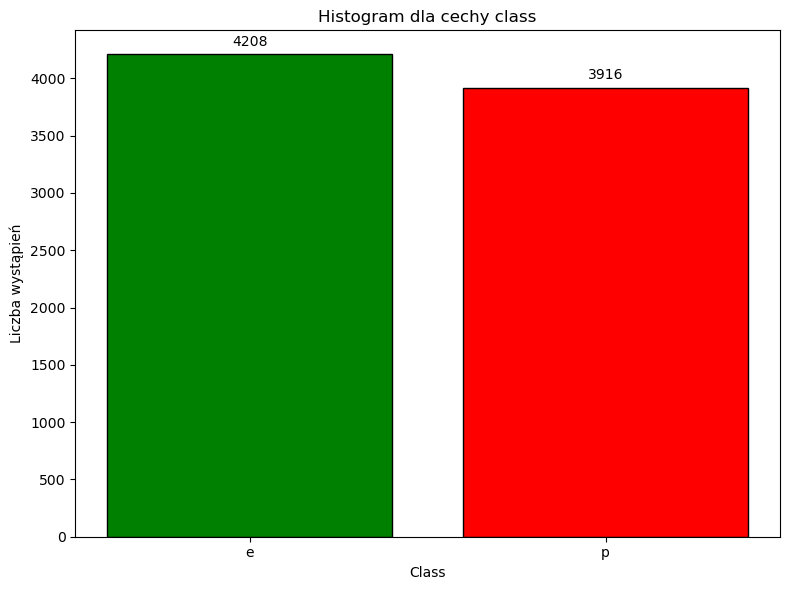

In [7]:
class_counts = data['class'].value_counts()

# Tworzenie histogramu dla cechy 'class'
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values, color=['green', 'red'], edgecolor='black')
plt.title('Histogram dla cechy class')
plt.xlabel('Class')
plt.ylabel('Liczba wystąpień')
plt.xticks(rotation=0)

# Dodawanie etykiet nad każdym słupkiem
for i, count in enumerate(class_counts.values):
    plt.text(i, count + 50, f'{count}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Zauważamy, że klasy w tym zbiorze danych są odpowiednio zbilansowane, dzięki czemu nie powinny wystąpić problemy ze sztucznie wysoki współczynnikiem *accuracy* wynikającym z nierównomiernego rozkładu liczebności klas docelowych.

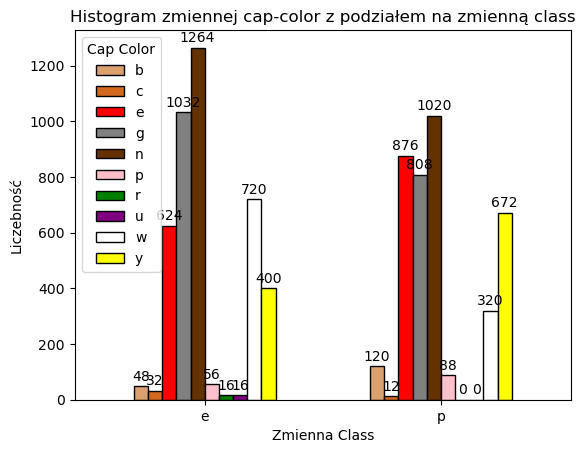

In [8]:
colors = ['#DAA06D','#D2691E','red','#808080','#633200','pink','g','purple','white','yellow']

grouped = data.groupby(['class', 'cap-color']).size().unstack()

ax = grouped.plot(kind='bar', color=colors, edgecolor='black', width=0.6)  # Ustawienie szerokości słupków
plt.title('Histogram zmiennej cap-color z podziałem na zmienną class')
plt.xlabel('Zmienna Class')
plt.ylabel('Liczebność')
plt.xticks(rotation=0)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 10, f'{int(height)}', ha='center', va='bottom')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, title='Cap Color')

plt.show()

Zatem z powyższego wykresu możemy wnioskować, że słabym wyznacznikiem tego, czy grzyb jest trujący są kolory oznaczone przeza symbol *g* (szary) oraz *n* (brązowy). Obserwując rozkład wartości dla innych najczęściej występujących kolorów, przykładowo dla koloru *w* (biały), widzimy, że grzyby jadalne występują ponad dwa razy częściej niż ich trujące odpowiedniki o tym ubarwienu, nieco odwrotnie ma się sytuacja jeżeli przyjrzymy się żółtym słupkom wykresu - niespełna 60% więcej grzybów o kapeluszu tego koloru to grzyby trujące. Kolor czerwony, którym kojarzy się z grzybami trującymi jest nie do końca dobrym wyróżnikiem tego, czy dany grzyb faktycznie jest niejadalny, ponieważ niespełna 30% więcej grzybów o tym zabarwieniu okazuje się być trujące. Natomiast w przypadku kolorów *r* (zielony) oraz *u* (fioletowy) możemy mieć całkowitą pewność, że natrafiliśmy na grzyby jadalne.            

Zajmiemy się teraz wizualizacją, jak wartość cechy *odor* (zapach) wpływa na zmienną *class*.  

<Figure size 1000x500 with 0 Axes>

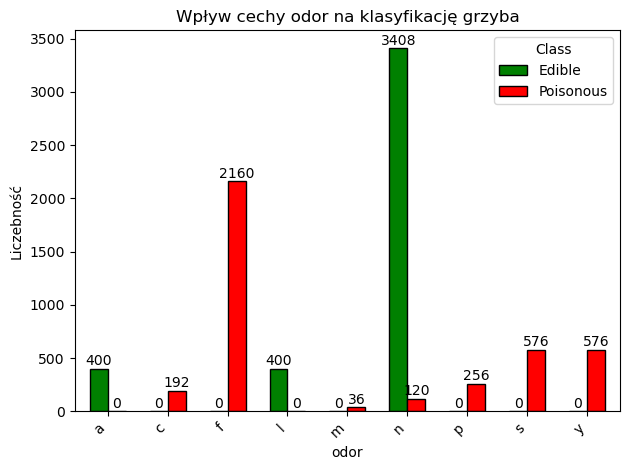

In [9]:
grouped_odor = data.groupby(['odor', 'class']).size().unstack().fillna(0)

plt.figure(figsize=(10, 5))
ax = grouped_odor.plot(kind='bar', color=['green', 'red'], edgecolor='black', width=0.6)
plt.title('Wpływ cechy odor na klasyfikację grzyba')
plt.xlabel('odor')
plt.ylabel('Liczebność')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{int(height)}', ha='center', va='bottom')
    else:
        ax.text(p.get_x() + p.get_width() / 2., 5, '0', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Zapach grzyba ma ogromny wpływ na jego klasę. W przypadku zapachów oznaczonych symbolami: *a* (migdał), *l* (anyż) oraz *n* (brak zapachu) możemy mieć pewność (z małym marginesem błędu w przypadku braku występowania zapachu), że dany grzyb będzie jadalny. W każdym z pozostałych wartości zmiennej *odor* mamy do czynienia z grzybami niejadalnymi. Cecha ta świetnie dywersyfikuje klasę grzybów.

<Figure size 1000x500 with 0 Axes>

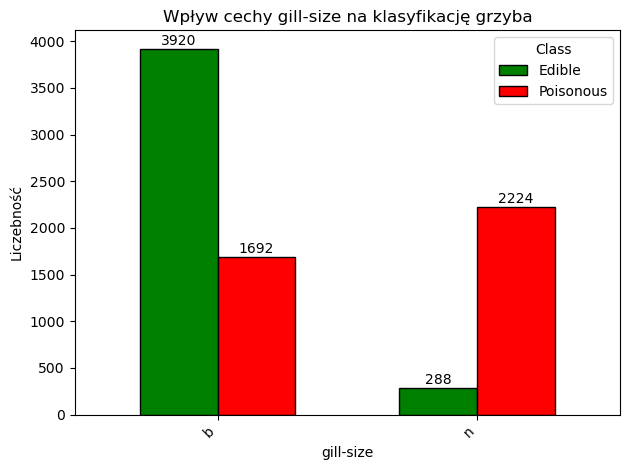

In [10]:
grouped_gill_size = data.groupby(['gill-size', 'class']).size().unstack().fillna(0)

plt.figure(figsize=(10, 5))
ax = grouped_gill_size.plot(kind='bar', stacked=False, color=['green', 'red'], edgecolor='black', width=0.6)
plt.title('Wpływ cechy gill-size na klasyfikację grzyba')
plt.xlabel('gill-size')
plt.ylabel('Liczebność')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{int(height)}', ha='center', va='bottom')
    else:
        ax.text(p.get_x() + p.get_width() / 2., 5, '0', ha='center', va='bottom')

plt.tight_layout()
plt.show()


W przypadku zmiennej *gill-size* nie dostrzegamy już tak ogromnego rozróżnienia ze względu na tę cechę, aczkolwiek nadal jest ono znaczące. Ponad dwa razy więcej grzybów o omawianej cesze równej wartości *b* (rozległy) to grzyby jadalne, podczas gdy niespełna osiem razy więcej jest grzybów trujących w przypadku pozostałej wartości cechy.    

<Figure size 1000x500 with 0 Axes>

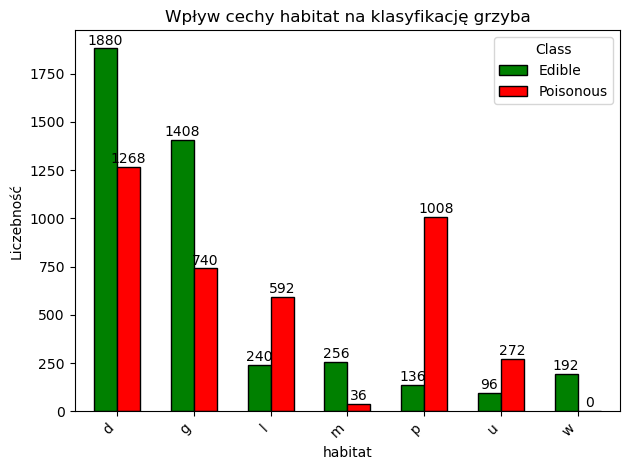

In [11]:
grouped_habitat = data.groupby(['habitat', 'class']).size().unstack().fillna(0)

plt.figure(figsize=(10, 5))
ax = grouped_habitat.plot(kind='bar', stacked=False, color=['green', 'red'], edgecolor='black', width=0.6)
plt.title('Wpływ cechy habitat na klasyfikację grzyba')
plt.xlabel('habitat')
plt.ylabel('Liczebność')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{int(height)}', ha='center', va='bottom')
    else:
        ax.text(p.get_x() + p.get_width() / 2., 5, '0', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Powyższy wykres obrazuje rozkład zmiennej *habitat* (miejsce występowania) w podziale na klasę grzybów. Niemalże dwa razy więcej grzybów występująych na tereniu typu *g* (trawy) jest jadalnych. Grzyby trujące stanowią większość w miejscach występowania typu *l* (obszary liściaste), *p* (przy ścieżkach) oraz *u* (tereny miejskie).
Grzyby niejadalne nie występują na terenach typu *w* (odpady).
<br />
Tabela poniżej pomaga w bardziej wnikliwym wglądzie w jaki sposób teren występowania grzybów różnicuje to czy są one jadalne. Wyniki wyrażają jaki procent całej obserwacji danej cechy stanowią zadane klasy.  

In [12]:
crosstab_habitat = pd.crosstab(data['habitat'], data['class'])
percent_habitat = (crosstab_habitat.div(crosstab_habitat.sum(1), axis=0) * 100).round(2)

percent_habitat

class         e      p
habitat               
d         59.72  40.28
g         65.55  34.45
l         28.85  71.15
m         87.67  12.33
p         11.89  88.11
u         26.09  73.91
w        100.00   0.00

Ostatnią cechą, której się dogłębniej przyjrzymy będzie zmienna *population*, wyjaśniająca w jakiego rodzaju skupiskach występują zebrane obserwacje grzybów. 

<Figure size 1000x500 with 0 Axes>

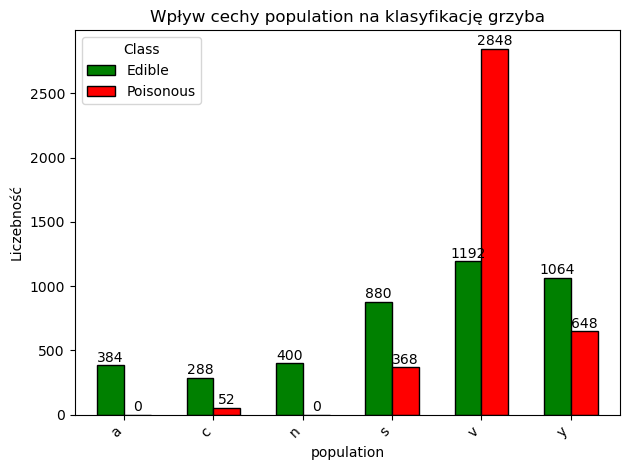

In [13]:
grouped_population = data.groupby(['population', 'class']).size().unstack().fillna(0)

plt.figure(figsize=(10, 5))
ax = grouped_population.plot(kind='bar', stacked=False, color=['green', 'red'], edgecolor='black', width=0.6)
plt.title('Wpływ cechy population na klasyfikację grzyba')
plt.xlabel('population')
plt.ylabel('Liczebność')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{int(height)}', ha='center', va='bottom')
    else:
        ax.text(p.get_x() + p.get_width() / 2., 5, '0', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Dla pierwszych trzech rodzajów skupisk jesteśmy praktycznie pewny, że zebrane grzyby są jadalne, gdyż stanowią one około:

In [14]:
str(100 - (grouped_population.p[0:3].sum()/grouped_population.e[0:3].sum()).round(2)) + '%'

'99.95%'

wszystkich grzybów występujących w tego rodzaju populacjach. Jeśli chodzi o aglomeracje typu *s* (rozsiane) oraz *y* (samotnie) to wciąż grzyby jadalne występują częściej niż ich trujące odpowiedniki, choć ich wkład w liczebność wzrósł. Grzyby występujące po kilka (zmienna *v*) to w zdecydowanej mierze grzyby niejadalne. 

**Ad 2.**

Pierwszą sprawą, którą się zajmiemy w etapie *preprocessingu* będzie analiza oraz ewentualna imputacja brakujących wartości cechy *stalk-root*. Rozkład wartości tej cechy ma się następująco: 

In [15]:
data["stalk-root"].value_counts()

stalk-root
b    3776
?    2480
e    1120
c     556
r     192
Name: count, dtype: int64

Zauważamy zatem, że brakujące informacje stanowią około:

In [16]:
str(round(sum(data["stalk-root"] == '?') / data.shape[0] * 100, 2)) + '%'

'30.53%'

wszystkich wartości tej cechy w omawionym zbiorze. Jest to bardzo duży odsetek braków informacji.

Przyjrzyjmy się dodatkowo jak cecha *stalk-root* ma się do tego czy dany grzyb jest jadalny.

<Figure size 1000x500 with 0 Axes>

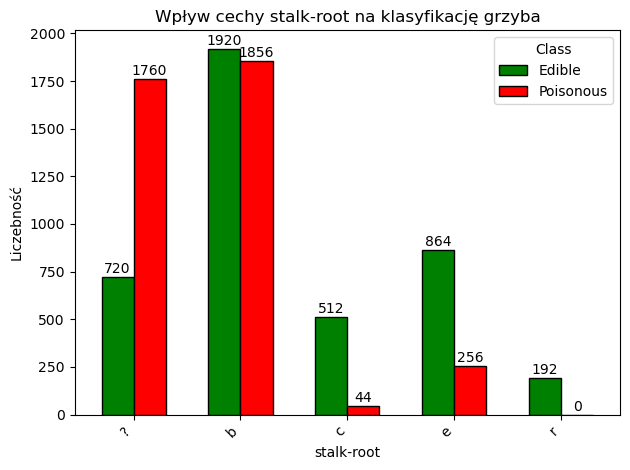

In [17]:
grouped_stalkroot = data.groupby(['stalk-root', 'class']).size().unstack().fillna(0)

plt.figure(figsize=(10, 5))
ax = grouped_stalkroot.plot(kind='bar', stacked=False, color=['green', 'red'], edgecolor='black', width=0.6)
plt.title('Wpływ cechy stalk-root na klasyfikację grzyba')
plt.xlabel('stalk-root')
plt.ylabel('Liczebność')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{int(height)}', ha='center', va='bottom')
    else:
        ax.text(p.get_x() + p.get_width() / 2., 5, '0', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Takie wartości tej zmiennej jak: *c*, *e* oraz *r* są zdominowane przez grzyby uznawane za jadalne. Największą konkurencję względem grzybów jadalnych obserwujemy, gdy wartość cechy to *b*. 

Zdecyduję się na pominięcie tej zmiennej przy dalszej analizie oraz budowie modelu. Przy tak dużym procencie braków oraz ich charakterystyce (braki występują falami, gdzie w kilkuset ostatnich wierszach zbioru danych występują jedynie informacje oznaczone jako brakujące). W takim przypadku, przykładowo chcąc posłużyć się metodą imputacji *najbliższych sąsiadów* (funkcja `KNNImputer`) finale wyniki mogą być zaburzone.

In [18]:
#| echo: true

data = data.drop(['stalk-root'], axis = 1)

Kolejnym krokiem jest konwersja zmiennych kategorycznych na zmienne liczbowe. Dla zmiennej *class* (zmienna target) posłużymy się funkcją `LabelEncoder`, która dla każdej zmiennej w danej kolumnie przypisze wartość od 0 do n-1, gdzie n to liczba unkialnych wartości danej kolumny. Wartości przypisywane są zgodnie z porządkiem alfabetycznym pierwotnych zmiennych.
<br>
Ze względu na to, że pozostałe cechy nie są względem siebie w żaden sposób zhierarchizowane (nie możemy ich uporządkować), należy wobec nich użyć funkcji `OneHotEncoder`, która podzieli daną kolumnę z cechą na tyle innych kolumn, ile jest unikatowych wartości danej cechy, a następnie będzie przypisywała wartość 1 dla wystąpień danej wartrości, a pozostałym 0. Tak dla każdej wartości danej cechy. W ten sposób  unikniemy możliwych błędnych interpretacji współzależności zmiennych przez algorytmy ML.   

In [19]:
X = data.drop(['class'], axis = 1)
y = data['class']

In [20]:
#| echo: true
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

le = LabelEncoder()
ohe = OneHotEncoder()

#y = le.fit_transform(y)
X = ohe.fit_transform(X)

In [21]:
X = X.toarray()

Zauważmy, że nasz zbiór cech po transformacji ma aż: 

In [22]:
X.shape[1]

112

nowych cech. Taka liczba zmiennych może stanowić spory problem przy tworzeniu modeli - może doporowadzić do przeuczenia się danych treningowych przez algorytmy klasyfikacyjne. W celu zapobiegnięcia temu posłużymy się jedną z technik redukcji wymiarowości - *PCA*.

In [23]:
#| echo: true
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[-1.14550996e+00, -3.98433220e-01,  6.62176555e-01, ...,
         9.75300134e-16,  4.34587324e-16, -4.32143528e-16],
       [-1.40184580e+00,  5.43145817e-01,  8.64637976e-01, ...,
         9.93453345e-16,  1.16821056e-16, -2.04999123e-16],
       [-1.55302201e+00,  3.00244927e-01,  6.97188978e-01, ...,
        -1.81696342e-16, -4.53313938e-16,  3.77028545e-17],
       ...,
       [-5.57123342e-01,  2.05624265e-01,  1.48652687e-01, ...,
         2.40510543e-17, -6.43792493e-17, -1.42726058e-17],
       [ 1.34417655e+00, -1.88565840e+00,  2.53723729e-01, ...,
         4.18891944e-18,  1.73914113e-17,  1.85682797e-17],
       [-5.18371351e-01,  2.27309929e-01,  2.48602121e-01, ...,
        -5.03621333e-17,  3.61043790e-17,  2.32751138e-17]])

Wizualizacja wkładu poszczególnych składowych w wyjaśnianie wariancji pierwotnego zestawu danych:

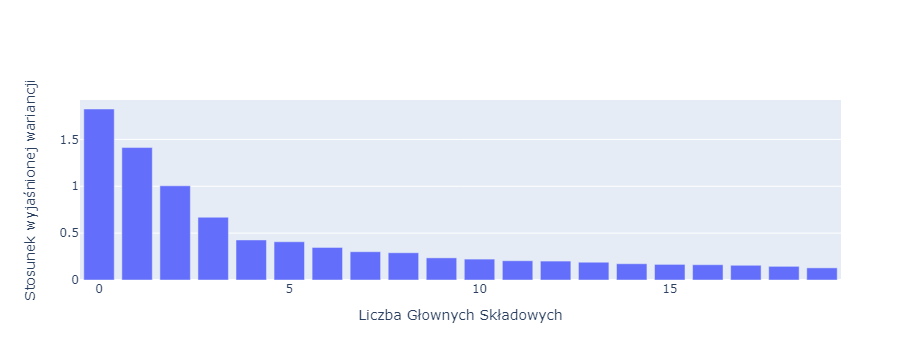

In [24]:
import plotly.graph_objects as go
import plotly.express as px

explained_variance = pca.explained_variance_

fig = go.Figure(go.Bar(
    x=list(range(20)), 
    y=explained_variance[:20],
))
fig.update_layout(
    xaxis_title='Liczba Głownych Składowych',
    yaxis_title='Stosunek wyjaśnionej wariancji'
)
fig.show()

Obserwujemy, że w okolicach dziesiątego komponentu wkład w wyjaśnioną wariancję mało się zmienia. Zatem założymy, że PCA z dziesięcioma komponentami będzie najbardziej optymalnym rozwiązaniem - między redukcją wymiarów/zmiennych a utratą wyjaśnionej wariancji.

In [25]:
pca1 = PCA(n_components=10)
X_pca = pca1.fit_transform(X)

Wymiary nowego zbioru cech:

In [26]:
X_pca.shape

(8124, 10)

Tworzymy zbiór uczący oraz testowy.

In [27]:
#| echo: true

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     X_pca, y, test_size=0.2,random_state=42)

Kolejnie ręcznie przypisujemy etykiety dla zmiennej target. Jako sukces oznaczamy grzyby, które są jadalne (przypisana zostanie im wartość *True*). 

In [28]:
#| echo: true
y_test = (y_test == "e")
y_train = (y_train == "e")

**Ad 3.** Przechodzimy do kolejnego etapu projektu. Zbudujemy kilka konkurencyjnych modeli w oparciu o przedstawiony powyżej zbiór testowy, następnie porównamy ich osiągi posługując się kroswalidacją. 

Pracę z modelami zaczniemy od zbudowania najprostszego możliwego modelu klasyfikującego - model ten jest instancją funkcji `DummyClassifier`, który każdą obserwację przyporządkowuje do najczęściej występującej klasy. W naszym przypadku będzie to klasa odpowiadająca za grzyby jadalne. 

In [29]:
#| echo: true
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train)

DummyClassifier()

Jakość doposowania modelu:

In [30]:
#| echo: true
dummy_clf.score(X_train, y_train)

0.5177719649176796

Tak jak się spodziewaliśmy, *accuracy* tego modelu wynosi tyle ile stanowi odsetek najczęściej występującej etykiety. Pozostałe modele będą miały na celu przebić dokładność tego klasyfikatora.


Kolejnym modelem, który zbudujemy będzie model **regresji logistycznej**.

<img src="https://miro.medium.com/v2/resize:fit:460/1*klFuUpBGVAjTfpTak2HhUA.png">

Implementacja za pomocą funkcji `LogisticRegression`:

In [31]:
#| echo: true
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg_clf = LogisticRegression()

Doposowanie modelu do zmiennych treningowych:

In [32]:
logreg_clf.fit(X_train, y_train)

LogisticRegression()

*Accuracy* wynosi:

In [33]:
logreg_clf.score(X_train, y_train)

0.9613786736420988

Sprawdźmy jak wygląda dokładność po wykorzystaniu techniki kroswalidacji 

In [34]:
cross_val_score(logreg_clf, X_train, y_train,
               cv = 5,
               n_jobs=-1,
               scoring="accuracy").mean()

0.9604551430094155

Bardzo mała różnca (na korzyść zbioru testowego) w wartościach metryki może świadczyć o niewielkim przeuczeniu modelu. Przyjrzymy się jak wygląda krzywa uczenia.

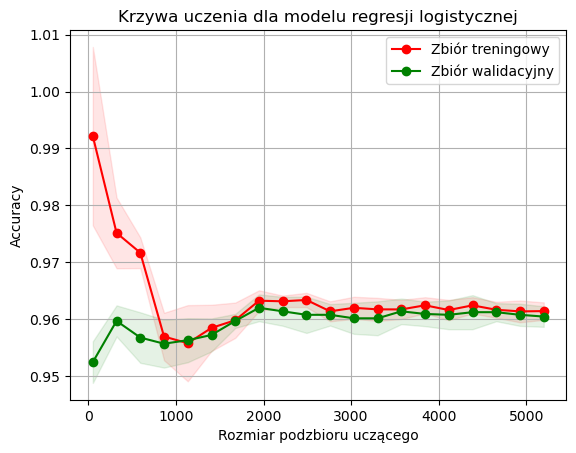

In [35]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    logreg_clf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.01, 1.0, 20), random_state=42
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Zbiór treningowy")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Zbiór walidacyjny")

plt.title('Krzywa uczenia dla modelu regresji logistycznej')
plt.xlabel('Rozmiar podzbioru uczącego')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.grid()
plt.show()

Wykres powyżej potwierdza nasze założenie o niewielkim *overfitting* modelu. Poprzez optymalizację hiperparametrów postaramy się temu zapobiec. <br>
Definiujemy siatkę parametrów do tuningu, gdzie: 
<ul>
    <li>
        <strong>C</strong>: Odwrotność siły regulyrizacji. Mała wartość oznacza silną regulyrizację, duża wartość oznacza słabą regularizację.
    </li>
    <li>
        <strong>tol</strong>: Tolerancja dla kryterium stopu w procesie optymalizacji. Proces zatrzyma się, gdy zmiana w funkcji kosztu między iteracjami będzie mniejsza niż `tol`. Mniejsza wartość oznacza bardziej precyzyjne kryterium zatrzymania.
    </li>
</ul>

In [36]:
#|echo : true

from sklearn.model_selection import GridSearchCV

logreg_params = {
    'C': np.logspace(-4, 4, 20),
    'tol': np.linspace(0.00001, 0.01, 20)
}


Przeszukujemy siatkę, następnie należy dopasować model.

In [37]:
grd_searchLogReg = GridSearchCV(logreg_clf, param_grid=logreg_params,
                               cv = 5,
                               scoring="accuracy",
                               n_jobs = -1)

grd_searchLogReg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+0...00000000e+04]),
                         'tol': array([1.00000000e-05, 5.35789474e-04, 1.06157895e-03, 1.58736842e-03,
       2.11315789e-03, 2.63894737e-03, 3.16473684e-03, 3.69052632e-03,
       4.21631579e-03, 4.74210526e-03, 5.26789474e-03, 5.79368421e-03,
       6.31947368e-03, 6.84526316e-03, 7.37105263e-03, 7.89684211e-03,
       8.42263158e-03, 8.94842105e-03, 9.47421053e-03, 1.00000000e-02])},
             scoring='accuracy')

Najlepsze parametry:

In [38]:
grd_searchLogReg.best_params_

{'C': 0.08858667904100823, 'tol': 1e-05}

Jakość poasowania na zbiorze treningowym:

In [39]:
best_logreg = grd_searchLogReg.best_estimator_

In [40]:
best_acc_train_log =  best_logreg.score(X_train, y_train)
best_acc_train_log

0.9626096322511155

Kroswalidacja:

In [41]:
best_acc_valid_log = cross_val_score(best_logreg, X_train, y_train,
               cv = 5,
               n_jobs=-1,
               scoring="accuracy").mean()
best_acc_valid_log

0.9624559720495057

Notujemy znacze usprawnienie modeli. Między *accuracy* na zbiorze treningowym a wynikiem kroswalidacji nie ma już właścieiwe różnicy. Wykres poniżej pokazuje, że w zoptymalizowanym modelu nie dochodzi do overfittingu.

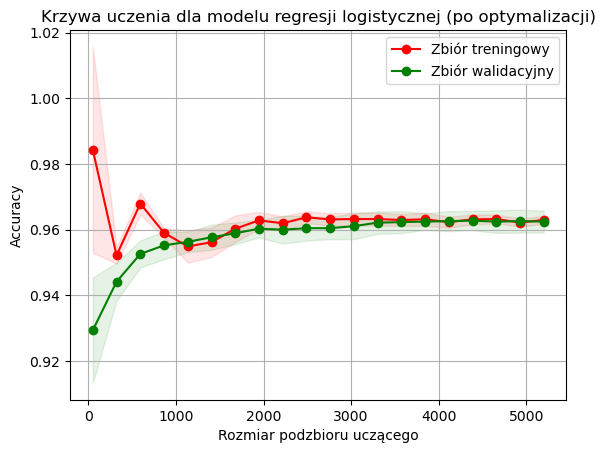

In [42]:
train_sizes, train_scores, val_scores = learning_curve(
    best_logreg, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.01, 1.0, 20), random_state=42
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Zbiór treningowy")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Zbiór walidacyjny")

plt.title('Krzywa uczenia dla modelu regresji logistycznej (po optymalizacji)')
plt.xlabel('Rozmiar podzbioru uczącego')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.grid()
plt.show()

Wartości *accuracy* modelu walidacyjnego oraz testowego osiągaja plateau, oznacza to, że model nie ma tendencji do nadmiernego dopasowania do danych treningowych.

Model **drzewa decyzyjnego**.

Budowę tego modelu rozpoczynamy od stworzenia instancji funkcji `DecisionTreeClassifier`. Następnie tworzymy siątkę parametrów: *max_depth* (maksymalna liczba poziomów w drzewie) oraz *max_features* (maksymalna liczba cech brana pod uwagę przy tworzeniu nowego węzła), którą użuwamy w funkcji `GridSearchCV`. Funkcja ta polega na tworzeniu kombinacji parametrów, których wartości podajemy w siatce parametrów, minimializując zadaną metrykę (w naszym przypadku *accuracy*).

In [43]:
#| echo: true

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

decisionTree_clf = DecisionTreeClassifier()

decisionTree_params = {
    'max_depth': [1, 2,3,4,5, 7, 9],
    'max_features': [1,2,3,4,5,6,7, 8, 9, 10, 11, 12]
}

In [44]:
decisionTree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
decisionTree_clf.score(X_train, y_train)

1.0

Tak wysokie *accuracy* na zbiorze treningowym może być alarmujące ze względu na możliwe nadmierne dopasowanie do danych treningowych. Przeprowadzamy krosswalidację.

In [46]:
cross_val_score(decisionTree_clf, X_train, y_train,
               cv = 5,
               n_jobs=-1,
               scoring="accuracy").mean()

0.996615266181086

Również możemy wnioskować, że występuję nadmierne dopasowanie do zestawu treningowego. Przeprowadzimy proces optymalizacji hiperparametrów.

In [47]:
#| echo:true 

grid_searchTree = GridSearchCV(decisionTree_clf, param_grid=decisionTree_params,
                               cv = 3,
                               scoring="accuracy")

grid_searchTree.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 7, 9],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12]},
             scoring='accuracy')

Znaleziony optymalny estymator:

In [48]:
grid_searchTree.best_params_

{'max_depth': 9, 'max_features': 12}

Dokładność testowa:

In [49]:
grid_searchTree.score(X_train, y_train)

1.0

In [50]:
bestTree = grid_searchTree.best_estimator_

Dokładność walidacyjna:

In [51]:
cross_val_score(bestTree, X_train, y_train,
               cv = 5,
               scoring="accuracy",
               n_jobs=-1).mean()

0.9967691123349323

Ceną niewielkiego spadku dokładnościu modelu otrzymaliśmy bardziej zoptymalizowany, lepiej uogólniający model.

Aby poprawnie ocenić jakość modelu, przenalizujemy krzywą uczenia, gdzie porównujemy przyrost/spadek *accuracy* z podziałem na zbiór testowy oraz walidacyjny, uzyskany poprzez przeprowadzenie kroswalidacji zbioru testowego.

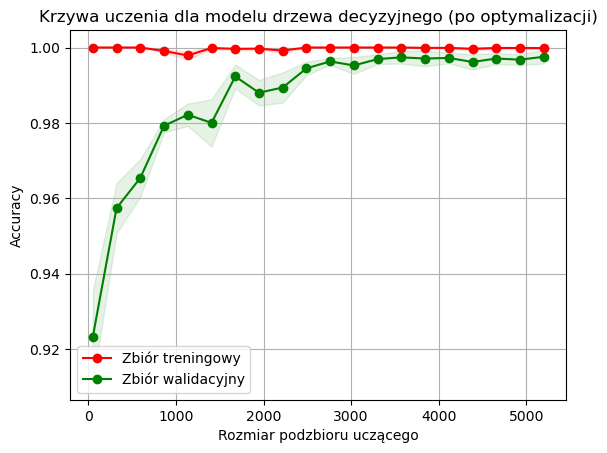

In [52]:
train_sizes, train_scores, val_scores = learning_curve(
    bestTree, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.01, 1.0, 20), random_state=42
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Zbiór treningowy")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Zbiór walidacyjny")

plt.title('Krzywa uczenia dla modelu drzewa decyzyjnego (po optymalizacji)')
plt.xlabel('Rozmiar podzbioru uczącego')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.grid()
plt.show()

Krzywa powyżej nadal świadczy o lekkim przetrenowaniu algorytmu. Porównajmy ją z wykresem przed tuningiem. 

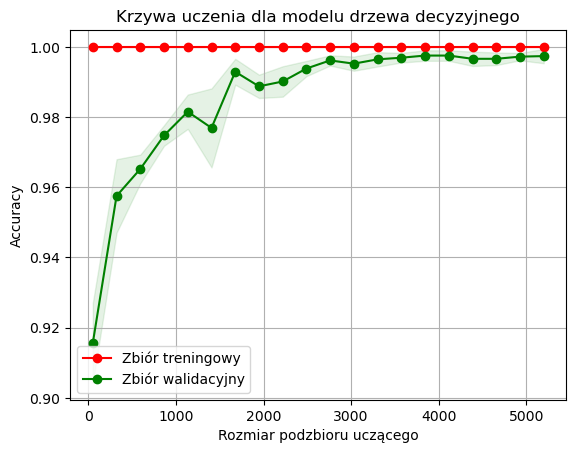

In [53]:
train_sizes, train_scores, val_scores = learning_curve(
    decisionTree_clf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.01, 1.0, 20), random_state=42
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Zbiór treningowy")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Zbiór walidacyjny")

plt.title('Krzywa uczenia dla modelu drzewa decyzyjnego')
plt.xlabel('Rozmiar podzbioru uczącego')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.grid()
plt.show()

Wykres po optymalizacji wygląda lepiej, wartości dla zbioru testowego w pewnych etapach są mniejsze.

Model **lasu losowego** - rodzaj modelu zespołowego (ang. *ensemble model*), który wykorzystuje wiele pojedynczych, niepowiązanych ze sobą drzew decyzyjnych do przeprowadzenia klasyfikacji. Każde drzewo w lesie losowym jest trenowane na innym podzbiorze danych (próbce bootstrapowej), a następnie z rezultatów klasyfikacji z każdego drzewa wybierana jest najczęściej występująca klasa. Podczas wzrostu drzewa w modelu lasu losowego w każdym węźle bierzemy pod uwagę jedynie losowy podzbiór cech dostępnych w danym zbiorze, następnie z tego wylosowanego podzbioru (najczęściej wielkość tego podzbioru to $\sqrt{n},$ gdzie $n$ to liczba wszystkich dostępnych cech) wybieramy cechę, która najlepiej dzieli na węzły potomne.  

Implementacja modelu.

In [54]:
#| echo: true
from sklearn.ensemble import RandomForestClassifier

random_clf = RandomForestClassifier(random_state=42)

Dopasowanie modelu do zbioru treningowego.

In [55]:
#| echo: true

random_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Wartość *accuracy* tego modelu:

In [56]:
random_clf.score(X_train, y_train)

1.0

Zbiór walidacyjny:

In [57]:
cross_val_score(random_clf, X_train, y_train,
               cv = 5,
               scoring="accuracy",
               n_jobs=-1).mean()

0.9996923076923077

Krzywa uczenia modelu bez optymalizacji: 

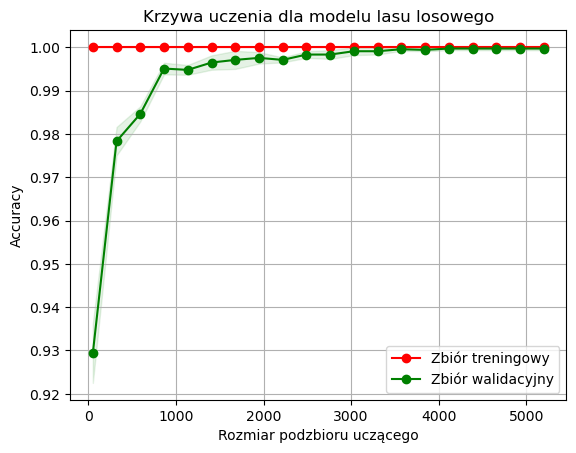

In [58]:
train_sizes, train_scores, val_scores = learning_curve(
    random_clf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.01, 1.0, 20), random_state=42
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Zbiór treningowy")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Zbiór walidacyjny")

plt.title('Krzywa uczenia dla modelu lasu losowego')
plt.xlabel('Rozmiar podzbioru uczącego')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.grid()
plt.show()

Ze względu na małe różnice w dokładności miedzy zbiorami trreningowym i walidacyjnym decydujemy się na pozostawienie modelu lasu losowego z jego podstawowymi parametrami.

Model **SGDClassifier** (Stochastic Gradient Descent Classifier) - przykład linowego klasyfikatora, który jest optymalizowany poprzez metodę stochastycznego spadku wzdłuż gradientu (*SGD*). Najpierw należy wyjaśnić jak przebiega ten algorytm optymalizacji. Ogólna koncepcja polega na iteratywnym poprawianiu parametrów $\theta$ modelu w celu zminimalizaowania funkcji kosztu $J$. Zaczynamy od przypisania losowych wartości parametom $\theta$ (inicjalizacja losowa), następnie poprzez parametr *learning rate* (współczynnik uczenia) ustalamy jak bardzo w każdym kroku mają się zmeniać nowe wagi parametrów $\theta$. Wartości $\theta$ są uaktualniane do momentu przekroczenia zadanej liczby epok (parametr *max_iter*), bądź do momentu uzyskania optymalnej wartości funkcji straty. W przypadku stochastycznej wersji tego algorytmu z każdą epoką losujemy ze zbioru treningowego nową próbkę, którą użyjemy do obliczenia gradientu. Oznacza to, że zamiast obliczać gradient na podstawie całego zbioru danych, obliczamy go na podstawie pojedynczych próbek, co znacznie usprawni proces minimalizacji funkcji kosztu.
<br>
W nazym modelu użyjemy parametru `loss = "hinge"`, co oznacza, że algorytm SGD zostanie zaimplementowany do optymalizacji liniowej wersji modelu SVM. Dodatkowo ustawimy parametr `early_stopping=True`, co onacza implementacje algorytmu wczesnego zatrzymania - polega ona na monitorowaniu wydajności modelu na zestawie walidacyjnym podczas treningu i zatrzymaniu procesu optymalizacji, gdy wydajność zaczyna się pogarszać.  

In [59]:
#| echo: true
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, early_stopping=True, penalty=None) # penalty = None -> brak regularyzacji

In [60]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(early_stopping=True, penalty=None, random_state=42)

Dokładność treningowa:

In [61]:
sgd_clf_train_pred = sgd_clf.predict(X_train)

accuracy_score(y_train, sgd_clf_train_pred)

0.961686413294353

Dokładność walidacyjna:

In [62]:
cross_val_score(sgd_clf, X_train, y_train,
               cv = 5,
               scoring="accuracy",
               n_jobs=-1).mean()

0.9546078048202759

Krzywa uczenia:

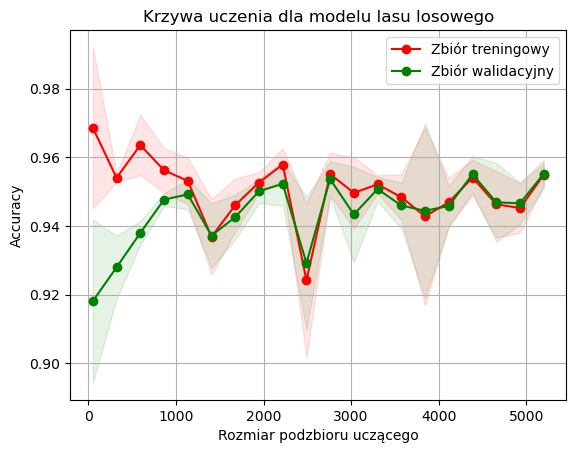

In [63]:
train_sizes, train_scores, val_scores = learning_curve(
    sgd_clf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.01, 1.0, 20), random_state=42
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Zbiór treningowy")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Zbiór walidacyjny")

plt.title('Krzywa uczenia dla modelu lasu losowego')
plt.xlabel('Rozmiar podzbioru uczącego')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.grid()
plt.show()

Przebieg uczenia jest chaotyczny (krzywe uczenia nie są gładkie, wartości *accuracy* skaczą), co jest zrozumiałe, gdyż algorytm SGD jest bardzo wrażliwy na odpowiednie dopasowanie hiperparametrów dla zadanego problemu.
<br> Implementujemy siatkę parametrów, gdzie:
<ul>
        <li>
            <strong>max_iter</strong>: Maksymalna liczba epok (iteracji), przez które algorytm będzie się uczył. 
            Większa liczba epok może pozwolić na dokładniejsze dopasowanie modelu do danych treningowych, ale może również prowadzić do nadmiernego dopasowania.
        </li>
        <li>
            <strong>eta0</strong>: Początkowa wartość współczynnika uczenia (learning rate). 
            Współczynnik uczenia kontroluje, jak duże kroki są podejmowane podczas aktualizacji parametrów modelu. Mały współczynnik uczenia prowadzi do mniejszych kroków, co może zapewnić stabilniejsze, ale wolniejsze zbieżności. Z kolei duży współczynnik może przyspieszyć uczenie, ale z ryzykiem przeskakiwania minimum funkcji kosztu.
        </li>
        <li>
            <strong>tol</strong>: Tolerancja dla kryterium zatrzymania. 
            Jeśli zmiana funkcji kosztu między kolejnymi epokami jest mniejsza niż ta wartość, proces uczenia zostanie przerwany przed osiągnięciem maksymalnej liczby iteracji. Pozwala to na oszczędność czasu obliczeniowego, jeśli model już zbiega do minimum.
        </li>
        <li>
            <strong>n_iter_no_change</strong>: Liczba epok, przez które funkcja kosztu musi się poprawiać, aby kontynuować uczenie. 
            Jeśli funkcja kosztu nie poprawia się przez określoną liczbę epok, proces uczenia zostanie przerwany. Zapobiega to marnowaniu zasobów na dalsze uczenie, gdy model już osiągnął optymalne parametry.
        </li>
    </ul>

In [64]:
param_sgd = {
    'max_iter': [100, 300, 500, 600, 700, 800, 900, 1000, 1200],
    'eta0': [0.001,0.015,0.01, 0.03],
    'tol': [1e-6,1e-5, 1e-4],
    'n_iter_no_change': [100, 150, 170, 200]
}

In [65]:
grid_sgd = GridSearchCV(sgd_clf, param_grid=param_sgd,
                               cv = 3,
                        n_jobs=-1,
                               scoring="accuracy")

grid_sgd.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=SGDClassifier(early_stopping=True, penalty=None,
                                     random_state=42),
             n_jobs=-1,
             param_grid={'eta0': [0.001, 0.015, 0.01, 0.03],
                         'max_iter': [100, 300, 500, 600, 700, 800, 900, 1000,
                                      1200],
                         'n_iter_no_change': [100, 150, 170, 200],
                         'tol': [1e-06, 1e-05, 0.0001]},
             scoring='accuracy')

Znalezione optymalne parametry:

In [66]:
grid_sgd.best_params_

{'eta0': 0.001, 'max_iter': 300, 'n_iter_no_change': 100, 'tol': 1e-06}

In [67]:
best_sgd = grid_sgd.best_estimator_

Dokładność treningowa nowego modelu:

In [68]:
#| echo: true
best_acc_train = accuracy_score(y_train, best_sgd.predict(X_train))
best_acc_train

0.963378981381751

Dokładność walidacyjna nowego modelu:

In [69]:
best_acc_valid_agd = cross_val_score(best_sgd, X_train, y_train,
               cv = 5,
               scoring="accuracy",
               n_jobs=-1).mean()
best_acc_valid_agd

0.9636865044116776

Po strojeniu hiperparametrów obie wartoście są zauważalnie wyższe.

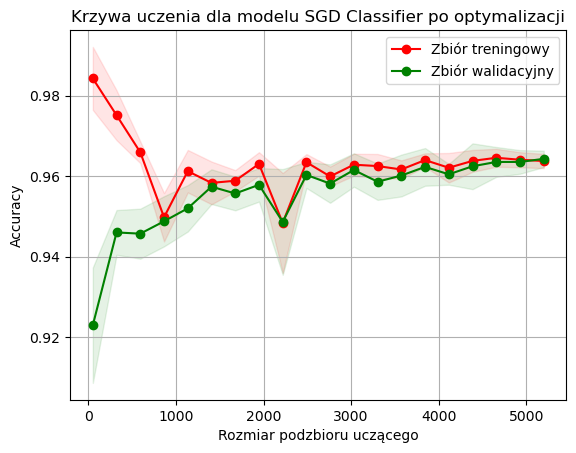

In [70]:
train_sizes, train_scores, val_scores = learning_curve(
    best_sgd, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.01, 1.0, 20), random_state=42
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Zbiór treningowy")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Zbiór walidacyjny")

plt.title('Krzywa uczenia dla modelu SGD Classifier po optymalizacji')
plt.xlabel('Rozmiar podzbioru uczącego')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.grid()
plt.show()

Krzywa uczenie również wygląda lepiej - nie występują już nagłe skoki w wartości metryki *accuracy*, które mogły wynikać ze złego dobrania parametru `eta0`.

Model **KNNClassifier** (K-Nearest Neighbors Classifier) - algorytm k-najbliższych sąsiadów zakłada, że podobne do siebie obserwacje znajdują się w bliskim otoczeniu w danej przestrzeni. W naszym przypadku odległość między punktami będziemy liczyli Euklidesowo, gdzie
$$d(A, B) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2},$$
wylicza odległość Euklidesową w $n$ wymiarowej przestrzeni. Klasyfikacja jest przeprowadzona poprzez głosowanie większościowe - dla nowego punktu obliczamy jego odległość od wszystkich pozostałych obserwacji, wybieramy $k$ najbliższych punktów, sprawdzamy etykiety tych punktów i  finalnie poprzez metodę głosowania większościowego przypisujemy etykietę nowej obserwacji.

Implementacja oraz dopasowanie modelu.

In [71]:
#| echo: true
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

In [72]:
#| echo: true

knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

Przewidywane klasy:

In [73]:
#| echo: true
x_train_pred_knn = knn_clf.predict(X_train)
x_train_pred_knn[:5]

array([False, False, False,  True,  True])

Faktycznie klasy:

In [74]:
#| echo: true
y_train.iloc[:5].values

array([False, False, False,  True,  True])

Dokładność na zbiorze treningowym:

In [75]:
accuracy_score(y_train, x_train_pred_knn)

0.9996922603477458

Dokładność walidacyjna:

In [76]:
cross_val_score(random_clf, X_train, y_train,
               cv = 5,
               scoring="accuracy",
               n_jobs=-1).mean()

0.9996923076923077

Przyjrzyjmy się krzywej uczenia:

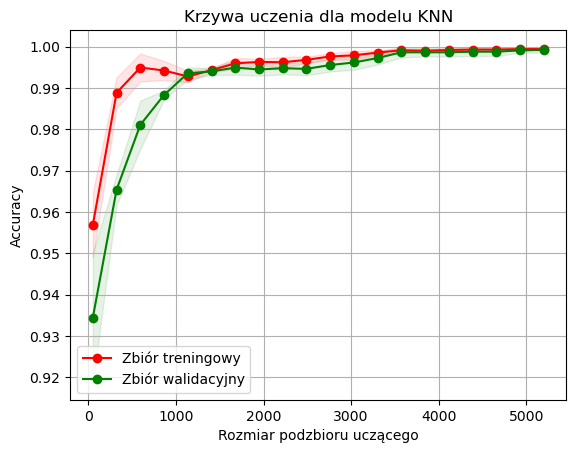

In [77]:
train_sizes, train_scores, val_scores = learning_curve(
    knn_clf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.01, 1.0, 20), random_state=42
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Zbiór treningowy")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Zbiór walidacyjny")

plt.title('Krzywa uczenia dla modelu KNN')
plt.xlabel('Rozmiar podzbioru uczącego')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.grid()
plt.show()

Wartości *accuracy* wraz ze wzrostem próbki uczącej zbiegają się dla obu zbiorów. Zobaczmy, czy po tuningu parametru odpowiadającego za liczbę sąsiednich punktów osiągniemy perfekcyjną dokładność.

Definiujemy siatkę parametrów. Składać się ona będzie jedynie z parametru określającego liczbę najbliższych sąsiadów, których etykiety będziemy porównywać w celu przypisania etykiety nieznanej obserwacji.

In [78]:
KNN_params = {
    'n_neighbors': np.arange(1, 30, 1, dtype=int)
}

grid_searchKNN = GridSearchCV(knn_clf, param_grid=KNN_params,
                               cv = 5,
                              n_jobs=-1,
                               scoring="accuracy")

In [79]:
grid_searchKNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             scoring='accuracy')

Najlepszy parametr:

In [80]:
grid_searchKNN.best_params_

{'n_neighbors': 1}

In [81]:
bestKNN = grid_searchKNN.best_estimator_

In [82]:
x_train_pred_bestKnn = knn_clf.predict(X_train)


Dokładność treningowa:

In [83]:
accuracy_score(y_train, x_train_pred_bestKnn)

0.9996922603477458

Dokładność walidacyjna:

In [84]:
cross_val_score(bestKNN, X_train, y_train,
               cv = 5,
               scoring="accuracy",
               n_jobs=-1).mean()

0.9998461538461537

W tym przypadku algorytm o wartościach domyślnych działa tak samo dobrze jak algorytm tuningowany. 

Przejdźmy teraz do zestawienia zbudowanych modeli. Porównamy ich osiągi względem metryki *accuracy* osiągnętej na zbiorze testowym.

Wartości są następujące:

In [85]:
accuracy_dict = {
    'Regresja Logistyczna': accuracy_score(y_test, best_logreg.predict(X_test)),
    'Drzewo Decyzyjne': accuracy_score(y_test, bestTree.predict(X_test)),
    'Las Losowy': accuracy_score(y_test, random_clf.predict(X_test)),
    'KNN Classifier': accuracy_score(y_test, bestKNN.predict(X_test)),
    'SGD Classifier': accuracy_score(y_test, best_sgd.predict(X_test))
}

accuracy_dict

{'Regresja Logistyczna': 0.9581538461538461,
 'Drzewo Decyzyjne': 0.9975384615384615,
 'Las Losowy': 1.0,
 'KNN Classifier': 1.0,
 'SGD Classifier': 0.96}

Wykres słupkowy dokładności danych modeli:

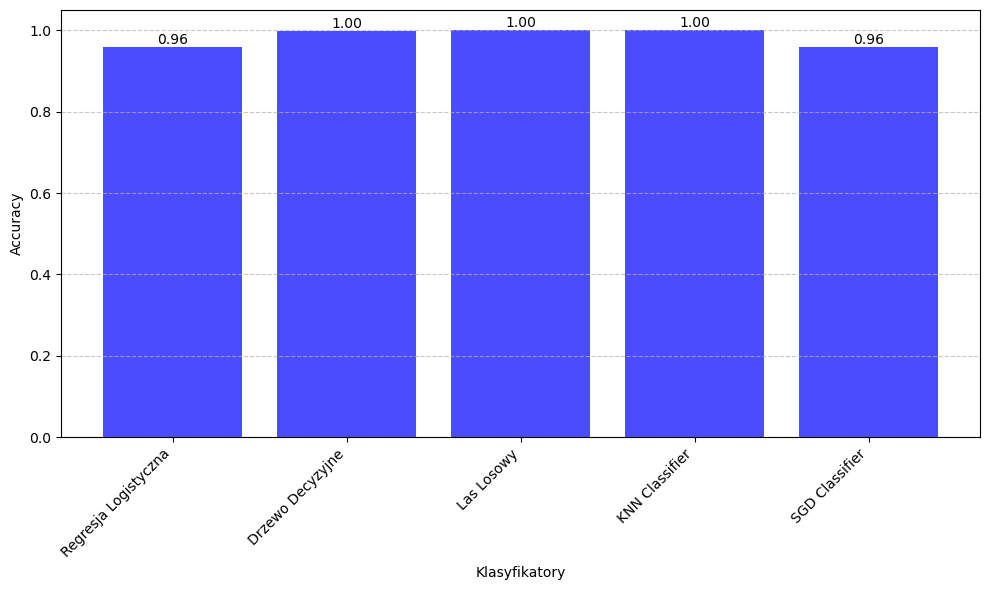

In [86]:
models = list(accuracy_dict.keys())
scores = list(accuracy_dict.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(models, scores, color='b', alpha=0.7)

# Add labels above bars
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height(), 
             '{:.2f}'.format(score), 
             ha='center', 
             va='bottom')

plt.xlabel('Klasyfikatory')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Zauważamy zatem, że każdy z modeli wypada bardzo dobrze. Jednakże klasyfikatory liniowe (regresja logistyczna, liniowe SVM z optymalizacją SVM) wypadają istotnie nieco gorzej od reszty modeli. Drzewo decyzyjna, czego mogliśmy się spodziewać, ma nieco gorszy performance od lasu losowego. 
<br> Podsumowując, pod względem *accuracy* najlepsze są modele lasu losowego oraz k-najbliższych sąsiadów. 

**Ad 4.** Analiza błedów modeli.

Przedstawimy zagadnienia, które będą pomocne przy analize błędów klasyfikacji modeli:

*Confusion Matrix* - macierz przedstawiająca liczbę prawdziwych pozytywnych (*TP*), prawdziwych negatywnych (*TN*), fałszywych pozytywnych (*FP*) i fałszywych negatywnych (*FN*) predykcji. Pozwala na bardziej szczegółową analizę błędów klasyfikacji oraz wyliczenie cennych wskaźników jakości klasyfikacji.
<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*Z54JgbS4DUwWSknhDCvNTQ.png" height = 400px> <br>
Interpretacja wartości macierzy pomyłek w kontekście naszego problemu:
<ul>
    <li><strong>True Positive (TP):</strong> Liczba grzybów jadalnych, które zostały poprawnie sklasyfikowane jako jadalne.</li>
    <li><strong>True Negative (TN):</strong> Liczba grzybów trujących, które zostały poprawnie sklasyfikowane jako trujące.</li>
    <li><strong>False Positive (FP):</strong> Liczba grzybów trujących, które zostały błędnie sklasyfikowane jako jadalne.</li>
    <li><strong>False Negative (FN):</strong> Liczba grzybów jadalnych, które zostały błędnie sklasyfikowane jako trujące.</li>
</ul>
W kontekście naszego zadania kluczowym czynnikiem decydującym o poprawności klasyfikatora będzie liczba fałszywych pozytywów (FP), gdyż konsekwencje klasyfikacji grzyba trującdego jako jadalnego mogą nieść dla potencjalnego konsumenta tragiczne skutki. W obliczu tego będziemy przykładali większą wagę do tej miary niż do liczby fałszywych negatywów (FN). W kontekście metryk <i>precision</i> i <i>recall</i> będziemy bardziej się skupiali na tej pierwszej z nich, ponieważ im większa jest jej wartość, tym mniejsza jest szansa na klasyfikację grzyba trującego jako jadalnego.

<br>
<i>Accuracy</i> - wskaźnik, który mierzy, jak często model uczenia maszynowego poprawnie przewiduje wynik. Dokładność można obliczyć, dzieląc liczbę poprawnych przewidywań przez całkowitą liczbę przewidywań.
$$Accuracy = \frac{Poprawne~predykcje}{Wszystkie~predykcje} = \frac{TP + TN}{TP + TN + FP + FN}$$
<br>
<i>Precision</i> - odsetek prawidłowych pozytywnych predykcji wśród wszystkich próbek zaklasyfikowanych jako pozytywne. Wskaźnik ten odpowiada na pytanie jak często pozytywne przewidywania są prawidłowe.
$$Precision = \frac{TP}{TP + FP}$$
<br>
<i>Recall</i> - mierzy, jak często model uczenia maszynowego poprawnie identyfikuje pozytywne instancje (prawdziwie pozytywne, *TP*) ze wszystkich rzeczywistych pozytywnych próbek w zbiorze danych.
$$Recall = \frac{TP}{TP+FN}$$
<br>
<i>F1 score</i> - średnia harmoniczna metryk *Recall* oraz *Precision*. Zastosowanie średniej harmonicznej sprawia, że większe wagi są nadawane mniejszym wartościom, przez co wartość tej miary będzie wysoka jedynie,gdy wysokie są wartości miar precyzji oraz pełności. 
$$F1 = \frac{2 \cdot \text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$
<br>
<i>Krzywa ROC</i>i> i <i>AUC (Area Under Curve)</i> - krzywa ROC to wykres przedstawiający zależność między <i>precision</i> a (1 - <i>sensivity</i>), gdzie
$$sensivity = \frac{FP}{FP + TN},$$
odpowiada za odsetek fałszywie zaklasyfikowanych negatywnych przypadków. Krzywa ROC pozwala zobaczyć, jak zmienia się wydajność modelu przy różnych progach decyzyjnych. Idealny model miałby krzywą, która przechodzi przez punkt (0,1) na wykresie, co oznaczałoby, że wszystkie pozytywne przypadki są prawidłowo klasyfikowane, a żadne negatywne przypadki nie są błędnie zaklasyfikowane jako pozytywne.
<br><img src="https://developers.google.com/static/machine-learning/crash-course/images/ROCCurve.svg" height = 400px> <br>
Natomiast AUC to pole pod krzywą ROC, które interpretujemy jako umiejętność modelu do rozróżniania klas. Im wyższa wartość AUC, tym lepsza wydajność modelu w rozróżnianiu klas pozytywnych i negatywnych. Interpretacja wartości *AUC*:

<ul>
    <li>AUC = 0.5: Model losowy, który nie ma zdolności do rozróżniania między klasami. Taka wartość AUC oznacza, że model działa równie dobrze jak losowe zgadywanie.</li>
    <li>0.5 &lt; AUC &lt; 1.0: Istnieje duże prawdopodobieństwo, że klasyfikator będzie w stanie odróżnić pozytywne wartości klasy od negatywnych. Dzieje się tak, ponieważ klasyfikator jest w stanie wykryć większą liczbę prawdziwych pozytywów i prawdziwych negatywów niż fałszywych negatywów i fałszywych pozytywów.</li>
    <li>AUC = 1.0: Klasyfikator może poprawnie rozróżnić wszystkie obserwacje klasy pozytywnej i negatywnej.</li>   
</ul>

Po wyjaśnieniu jakimi metrykami się posłużymi, przeanalizujmy nasze modele pod ich kątem. Przedstawione wskażniki wyliczamy już na podstawie zestawu testowego.

In [87]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score

models = ['Regresja Logistyczna', 'Drzewo Decyzyjne', 'Las Losowy', 'KNN Classifier', 'SGD Classifier']

precision = [precision_score(y_test, best_logreg.predict(X_test)),
             precision_score(y_test, bestTree.predict(X_test)),
             precision_score(y_test, random_clf.predict(X_test)),
             precision_score(y_test, bestKNN.predict(X_test)),
             precision_score(y_test, best_sgd.predict(X_test))]

recall = [recall_score(y_test, best_logreg.predict(X_test)),
          recall_score(y_test, bestTree.predict(X_test)),
          recall_score(y_test, random_clf.predict(X_test)),
          recall_score(y_test, bestKNN.predict(X_test)),
          recall_score(y_test, best_sgd.predict(X_test))]

auc = [roc_auc_score(y_test, best_logreg.predict_proba(X_test)[:, 1]),
       roc_auc_score(y_test, bestTree.predict_proba(X_test)[:, 1]),
       roc_auc_score(y_test, random_clf.predict_proba(X_test)[:, 1]),
       roc_auc_score(y_test, bestKNN.predict_proba(X_test)[:, 1]),
       roc_auc_score(y_test, best_sgd.decision_function(X_test))]

f1 = [f1_score(y_test, best_logreg.predict(X_test)),
      f1_score(y_test, bestTree.predict(X_test)),
      f1_score(y_test, random_clf.predict(X_test)),
      f1_score(y_test, bestKNN.predict(X_test)),
      f1_score(y_test, best_sgd.predict(X_test))]

metrics_df = pd.DataFrame({'Model': models,
                           'Precision': precision,
                           'Recall': recall,
                           'AUC': auc,
                           'F1': f1})

metrics_df

Model  Precision    Recall       AUC        F1
0  Regresja Logistyczna   0.953216  0.966785  0.992092  0.959953
1      Drzewo Decyzyjne   0.998811  0.996441  0.997581  0.997625
2            Las Losowy   1.000000  1.000000  1.000000  1.000000
3        KNN Classifier   1.000000  1.000000  1.000000  1.000000
4        SGD Classifier   0.954439  0.969158  0.991740  0.961742

W oparciu o powyższą tabelę widzimy, że wnioski o modelach poczynione na temat *accuracy* przekładają się na metryki dot. analizy błędów klasyfikacji. Najlepszymi modeli, nie popełniającymi żadnych błędów, są te modele, które miały najwyższą dokładność tj.: model las losowego oraz model k-najbliższych sąsiadów. 
<br>
Drugim modelem jest model drzewa decyzyjnego. Nie jest on już tak idealny, natomiast nadal świetnie się sprawdza. Przyjrzyjmy się jego macierzy pomyłek:

In [89]:
from sklearn.metrics import confusion_matrix

cm_tree = confusion_matrix(y_test, bestTree.predict(X_test))
cm_tree

array([[781,   1],
       [  3, 840]], dtype=int64)

Tak jak wspomniano na początku rozdziału, w kontekście naszego problemu kluczowym czynnikiem jest liczba fałszywych (trujących grzybów) obserwacji zaklasyfikowanych jako pozytywne (grzyby jadalne). W przypadku modelu drzewa decyzyjnego mamy  

In [90]:
cm_tree[0, 1]
#(cm_tree[0, 1] / y_test.shape[0])

1

błędów *FP*, co stanowi około 0,05% obserwacji zbioru testowego. Liczba *FP* jest o jedną obserwację mniejsza od liczby *FN*. 

Analizę błędów klasyfikatorów liniowych zaczynamy od regresji logistycznej.

Wskaźniki tego modelu wypadają najgorzej. Postać macierzy pomyłek:

In [91]:
cm_log = confusion_matrix(y_test, best_logreg.predict(X_test))
cm_log

array([[742,  40],
       [ 28, 815]], dtype=int64)

Macierz pomyłek tego modelu wygląda alarmująco - mamy 40 obserwacji typy *FP*, co stanowi już:

In [92]:
str(((cm_log[0, 1] / y_test.shape[0]) * 100).round(1)) + "%"

'2.5%'

wszystkich obserwacji testowych. Stanowi to znaczący odsetek, co powduje, że model regresji logistycznej nie jest odpowiedni do zadanego problemu. Łącznie model tej popełnił  

In [93]:
cm_log[0,1] + cm_log[1,0]

68

błędnych klasyfikacji, z czego aż:

In [94]:
cm_log[0,1]

40

błędnych klasyfikacji obserwacji negatywnych jako pozytywne.

Zobaczymy jak przedstawiają się statystyki ostatniego modelu, również liniowego - SGD Classifier. Jeżeli chodzi o metryki z tabeli wyżej, performance modelu wygląda podobnie do modelu regresji logistycznej. Macierz pomyłek:

In [95]:
cm_sgd = confusion_matrix(y_test, best_sgd.predict(X_test))
cm_sgd

array([[743,  39],
       [ 26, 817]], dtype=int64)

Jest nieco lepiej. Model SGD Classifier popełnił mniej błędów *FP*, choć w porównaniu do reszty modli liczba ta nadal jest spora. Łącznie algorytm popełnił:

In [96]:
cm_sgd[0,1] + cm_sgd[1,0]

65

błędnych klasyfikacji, z czego

In [97]:
cm_sgd[0,1]

39

klasyfikacji grzybów trujących jako jadalne, co stanowi

In [98]:
str(((cm_sgd[0, 1] / y_test.shape[0]) * 100).round(1)) + "%"

'2.4%'

obserwacji testowych. 

**Podsumowując**. Modeli, które sprawdzają się idealnie do tego problemu, są klasyfikatory nieliniowe: las losowy oraz k-najbliższych sąsiadów. Nieco gorzej wypada model pojedynczego drzewa decyzyjnego. Klasyfikatory liniowe sprawdzają się gorzej przy danych, gdzie każda zmienna została zakodowana z użyciem funckji `OneHotEncoder`. Z małą poprawką, że model z użyciem optymalizacji SGD można prawdopodnie jeszcze nieco ulepszyć, poprzez dalsze poszukiwanie optymalnych parametrów.  